In [1]:
import numpy as np
import pandas as pd
from src.workflow_manager.paths import data_path, ruleset_path
from src.pipelines.load_and_transform_pipeline import load_and_transform
from src.pipelines.dataframe_analyzer import get_values
from src.pipelines.one_hot_encoding import get_dummies

import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('display.max_columns',None)

In [2]:
data = load_and_transform(data_path, ruleset_path)
data.head()

,contract_nr,bonus_malus_class_liability,bonus_malus_class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product_included,deductible_fully_comprehensive,deductible_partially_comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults,SF_KH_num,SF_VK_num,payment_fault,young_driver,Friday_first
0,1,SF1/2,SF1/2,34,YOB,Original,New Vehicle,KH,0,0,Monthly,Insured and Spouse/Partner,Standard,10,11,12000,5.0,1.0,0.5,0.5,1,0,0
1,2,SF31,SF31,55,YOB,Original,Change of Insurer,KH,0,0,Pay In Full,Insured and Spouse/Partner,Standard,2,7,9000,6.0,0.0,31.0,31.0,0,0,0
2,3,SF5,SF5,52,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,11,12,20000,1.0,0.0,5.0,5.0,0,0,0
3,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,0.0,15.0,15.0,0,0,0
4,5,SF17,SF18,42,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,2,15000,3.0,0.0,17.0,18.0,0,0,0


In [3]:
data.describe(percentiles=[0.01, 0.05, 0.1,.2,.3,.5,.8,.9,.95,.99]).T.drop(['count','mean'], axis=1).drop('contract_nr',axis=0)

,std,min,1%,5%,10%,20%,30%,50%,80%,90%,95%,99%,max
age_insured_person,13.811587,18.0,22.0,26.0,29.0,33.0,37.0,44.0,58.0,64.0,71.0,80.0,93.0
deductible_fully_comprehensive,235.982766,0.0,0.0,0.0,0.0,0.0,0.0,300.0,300.0,500.0,500.0,1000.0,1000.0
deductible_partially_comprehensive,90.569269,0.0,0.0,0.0,0.0,0.0,150.0,150.0,150.0,150.0,300.0,300.0,500.0
car_age_at_purchase,5.995697,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,15.0,18.0,21.0,36.0
car_age_contract_start,6.025014,-1.0,0.0,0.0,1.0,2.0,4.0,8.0,14.0,17.0,19.0,23.0,37.0
annual_mileage,5744.329090,600.0,2400.0,5000.0,6000.0,9000.0,9000.0,12000.0,15000.0,20000.0,25000.0,30000.0,90000.0
risk_predictor_zip_code,2.526982,1.0,1.0,1.0,2.0,2.0,3.0,5.0,8.0,9.0,9.0,9.0,9.0
number_of_payment_faults,1.464221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,7.0,17.0
SF_KH_num,10.089966,-1.0,0.0,0.5,0.5,2.0,5.0,11.0,21.0,27.0,32.0,37.0,44.0
SF_VK_num,10.233013,-1.0,0.0,0.5,0.5,2.0,5.0,11.0,22.0,28.0,32.0,37.0,44.0


## <font color='#f88231'>Bining and Grouping</font>
Carrying the results from Power Bi we will Bin, Group and Change the Data as follows:

### <font color='#f88231'>Age of insured Person</font>
>         'age_group_1': [:24]  
>         'age_group_2': [25:30]  
>         'age_group_3': [31:40]  
>         'age_group_4': [41:53]  
>         'age_group_5': [54:]  
          
### <font color='#f88231'>sf_tpl</font>
>         'sf_tpl_group_1': [:0.5]  
>         'sf_tpl_group_2': [1:3]  
>         'sf_tpl_group_3': [4:6]  
>         'sf_tpl_group_4': [7:10]  
>         'sf_tpl_group_5': [11:]  

### <font color='#f88231'>sf_fc</font>
>         'sf_fc_group_1': [M,S]  
>         'sf_fc_group_2': [0,0.5]  
>         'sf_fc_group_3': [1:3]  
>         'sf_fc_group_4': [4:10]  
>         'sf_fc_group_5': [11:19]  
>         'sf_fc_group_5': [20:]  


### <font color='#f88231'>Profession</font>
* OneHotEncode 'Public Service'

### <font color='#f88231'>Payment</font>
* OneHotEncode 'Pay in Full'

### <font color='#f88231'>Tariff</font>
* OneHotEncode 'Pay per km'

### <font color='#f88231'>Policy Start</font>
* OneHotEncode 'YEB'

### <font color='#f88231'>Cover</font>
* OneHotEncode 'VK', 'TK

### <font color='#f88231'>Cover</font>
* OneHotEncode 'New Vehicle', 'First Vehicle'

### <font color='#f88231'>Deductibles</font>
* new Columns für partial Deductables for Coverages


### <font color='#f88231'>Regional Classes</font>
>         'region_group_1': [1,4]  
>         'region_group_2': [5,6,7]  
>         'region_group_3': [2,3,8]  
>         'region_group_4': [9] 


### <font color='#f88231'>Insured Parties</font>
* OneHotEncode 'insured and others'


### <font color='#f88231'>Car Age Group (age at purchase)</font>
>         'car_age_pur_group_1': [1:4]  
>         'car_age_pur_group_2': [5:10]  
>         'car_age_pur_group_3': [11:]  

### <font color='#f88231'>Car Age Group (age at policy start)</font>
>         'car_age_cont_group_01': [:2]  
>         'car_age_cont_group_02': [3:6]  
>         'car_age_cont_group_03': [7:10]
>         'car_age_cont_group_04': [11]
>         'car_age_cont_group_05': [12]
>         'car_age_cont_group_06': [13]
>         'car_age_cont_group_07': [14]
>         'car_age_cont_group_08': [15]
>         'car_age_cont_group_09': [16]
>         'car_age_cont_group_10': [17]
>         'car_age_cont_group_11': [18:]

## <font color='#f88231'>Interactions</font>

### **tariff_type <-> payment_interval**
> [original , monthly]  
> [original , year]  
> [km , monthly]  
> [km , year]  

### **insured_Parties <-> payment_interval**
> [others , monthly]  
> [others , year]  
> [spouce , monthly]  
> [spouce , year]  





In [4]:
# Ignore the milage
#sns.heatmap(data[['annual_mileage', 'payment_fault']].corr(), annot=True)


## Build Scripts

### First Grouping / Binning, then encoding


In [5]:
def grouper(x, bins, labels):
    
    if len(bins) != len(labels):
        return 'Bad Labels'
    
    for i in np.arange(len(bins)):
        if x < bins[i]:
            return labels[i]
        
    return 'NO_GROUP'





In [48]:
def get_model_data()-> pd.DataFrame:
    return data.copy()




test = get_model_data()


# Age Group
age_group_bins = [25, 31, 41, 54, 999]
age_group_labels = [ 'age_group_1'
                    ,'age_group_2'
                    ,'age_group_3'
                    ,'age_group_4'
                    ,'age_group_5'
                    ]

test['age_group'] = test['age_insured_person'].apply(grouper,bins=age_group_bins, labels = age_group_labels)

# sf_fc Group
sf_tpl_group_bins = [0, 1, 4, 7, 11, 999]
sf_tpl_group_labels = ['sf_tpl_group_1'
                      ,'sf_tpl_group_2'
                      ,'sf_tpl_group_3'
                      ,'sf_tpl_group_4'
                      ,'sf_tpl_group_5'
                      ,'sf_tpl_group_6'
                      ]

test['sf_tpl_group'] = test['SF_KH_num'].apply(grouper,bins=sf_tpl_group_bins, labels = sf_tpl_group_labels)



# sf_fc Group
sf_fc_group_bins = [0, 1, 4, 11, 20, 999]
sf_fc_group_labels = [ 'sf_fc_group_1'
                      ,'sf_fc_group_2'
                      ,'sf_fc_group_3'
                      ,'sf_fc_group_4'
                      ,'sf_fc_group_5'
                      ,'sf_fc_group_6'
                      ]

test['sf_fc_group'] = test['SF_VK_num'].apply(grouper,bins=sf_fc_group_bins, labels = sf_fc_group_labels)

# Region Group
test['region_group'] = test['risk_predictor_zip_code'].apply(lambda x : 'reg_group_1' if x in [1,4] else 'reg_group_2' if x in [5,6,7] else 'reg_group_3' if x in [2,3,8] else 'reg_group_4'  )

#car_age_at_purchase
car_age_pur_group_bins = [5, 11, 999]
car_age_pur_group_labels = [ 'car_age_pur_group_1'
                            ,'car_age_pur_group_2'
                            ,'car_age_pur_group_3'
                        ]

test['car_age_pur_group'] = test['car_age_at_purchase'].apply(grouper,bins=car_age_pur_group_bins, labels = car_age_pur_group_labels)



#car_age_contract_start
car_age_cont_group_bins = [3,7, 11,12,13,14,15,16,17,18, 999]
car_age_cont_group_labels = [ 'car_age_cont_group_01'
                             ,'car_age_cont_group_02'
                             ,'car_age_cont_group_03'
                             ,'car_age_cont_group_04'
                             ,'car_age_cont_group_05'
                             ,'car_age_cont_group_06'
                             ,'car_age_cont_group_07'
                             ,'car_age_cont_group_08'
                             ,'car_age_cont_group_09'
                             ,'car_age_cont_group_10'
                             ,'car_age_cont_group_11'
                        ]

test['car_age_cont_group'] = test['car_age_contract_start'].apply(grouper,bins=car_age_cont_group_bins, labels = car_age_cont_group_labels)


test[['bonus_malus_class_liability', 'SF_KH_num', 'sf_tpl_group']]

,bonus_malus_class_liability,SF_KH_num,sf_tpl_group
0,SF1/2,0.5,sf_tpl_group_2
1,SF31,31.0,sf_tpl_group_6
2,SF5,5.0,sf_tpl_group_4
3,SF15,15.0,sf_tpl_group_6
4,SF17,17.0,sf_tpl_group_6
...,...,...,...
27945,SF5,5.0,sf_tpl_group_4
27946,SF8,8.0,sf_tpl_group_5
27947,SF2,2.0,sf_tpl_group_3
27948,SF18,18.0,sf_tpl_group_6


## <font color='#f88231'>Encoding</font>



In [36]:
# cols_to_encode = [   'age_group'
#                     ,'sf_tpl_group'
#                     ,'sf_fc_group'
#                     ,'region_group'
#                     ,'car_age_pur_group'
#                     ,'car_age_cont_group'
#                     ]



# cols_include = []
# cols_exclude = []

# for col in cols_to_encode:

#     cols_include = cols_include+ list(test[col].value_counts().reset_index().iloc[1:][col])
#     cols_exclude = cols_exclude + [test[col].value_counts().reset_index().iloc[0][col]]


#     print(col,':\t\t', test[col].value_counts().reset_index().iloc[0][col])





In [38]:
# cols_exclude

In [37]:
# for c in cols_to_encode:
#     exc = test[col].value_counts().reset_index().iloc[0][col]
    
#     test = get_dummies(test, c, exc)



# test

In [45]:
data.columns

Index(['contract_nr', 'bonus_malus_class_liability',
       'bonus_malus_class_comprehensive', 'age_insured_person', 'policy_start',
       'tariff_type', 'type_of_insurance', 'comprehensive_product_included',
       'deductible_fully_comprehensive', 'deductible_partially_comprehensive',
       'payment_interval', 'insured_parties', 'profession_group',
       'car_age_at_purchase', 'car_age_contract_start', 'annual_mileage',
       'risk_predictor_zip_code', 'number_of_payment_faults', 'SF_KH_num',
       'SF_VK_num', 'payment_fault', 'young_driver', 'Friday_first'],
      dtype='object')

In [49]:
cols_to_encode = [   'age_group'
                    ,'sf_tpl_group'
                    ,'sf_fc_group'
                    ,'region_group'
                    ,'car_age_pur_group'
                    ,'car_age_cont_group'

                    ,'profession_group'
                    ,'payment_interval'
                    ,'tariff_type'
                    ,'policy_start'
                    ,'comprehensive_product_included'
                    ,'type_of_insurance'
                    
                    
                    
                    
                    ,'insured_parties'
                    ]

for col in cols_to_encode:

    print(col,':\t\t', test[col].value_counts().reset_index().iloc[0][col])


age_group :		 age_group_4
sf_tpl_group :		 sf_tpl_group_6
sf_fc_group :		 sf_fc_group_5
region_group :		 reg_group_2
car_age_pur_group :		 car_age_pur_group_1
car_age_cont_group :		 car_age_cont_group_01
profession_group :		 Standard
payment_interval :		 Monthly
tariff_type :		 Original
policy_start :		 YOB
comprehensive_product_included :		 VK
type_of_insurance :		 Change of Insurer
insured_parties :		 Insured and Spouse/Partner


In [50]:
test = get_dummies(test, 'age_group' , 'age_group_4')
test = get_dummies(test, 'sf_tpl_group' , 'sf_tpl_group_6')
test = get_dummies(test, 'sf_fc_group' , 'sf_fc_group_5')
test = get_dummies(test, 'region_group' , 'reg_group_2')
test = get_dummies(test, 'car_age_pur_group' , 'car_age_pur_group_1')
test = get_dummies(test, 'car_age_cont_group' , 'car_age_cont_group_01')
test = get_dummies(test, 'profession_group' , 'Standard')
test = get_dummies(test, 'payment_interval' , 'Monthly')
test = get_dummies(test, 'tariff_type' , 'Original')
test = get_dummies(test, 'policy_start' , 'YOB')
test = get_dummies(test, 'comprehensive_product_included' , 'VK')
test = get_dummies(test, 'type_of_insurance' , 'Change of Insurer')
test = get_dummies(test, 'insured_parties' , 'Insured and Spouse/Partner')

test





### <font color='#f88231'>Cover</font>
#* OneHotEncode 'New Vehicle', 'First Vehicle'

### <font color='#f88231'>Deductibles</font>
#* new Columns für partial Deductables for Coverages




,contract_nr,bonus_malus_class_liability,bonus_malus_class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product_included,deductible_fully_comprehensive,deductible_partially_comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults,SF_KH_num,SF_VK_num,payment_fault,young_driver,Friday_first,age_group,sf_tpl_group,sf_fc_group,region_group,car_age_pur_group,car_age_cont_group,age_group@age_group_1,age_group@age_group_2,age_group@age_group_3,age_group@age_group_5,sf_tpl_group@sf_tpl_group_1,sf_tpl_group@sf_tpl_group_2,sf_tpl_group@sf_tpl_group_3,sf_tpl_group@sf_tpl_group_4,sf_tpl_group@sf_tpl_group_5,sf_fc_group@sf_fc_group_1,sf_fc_group@sf_fc_group_2,sf_fc_group@sf_fc_group_3,sf_fc_group@sf_fc_group_4,sf_fc_group@sf_fc_group_6,region_group@reg_group_1,region_group@reg_group_3,region_group@reg_group_4,car_age_pur_group@car_age_pur_group_2,car_age_pur_group@car_age_pur_group_3,car_age_cont_group@car_age_cont_group_02,car_age_cont_group@car_age_cont_group_03,car_age_cont_group@car_age_cont_group_04,car_age_cont_group@car_age_cont_group_05,car_age_cont_group@car_age_cont_group_06,car_age_cont_group@car_age_cont_group_07,car_age_cont_group@car_age_cont_group_08,car_age_cont_group@car_age_cont_group_09,car_age_cont_group@car_age_cont_group_10,car_age_cont_group@car_age_cont_group_11,profession_group@Public service,payment_interval@Pay In Full,tariff_type@Pay per km,policy_start@YEB,comprehensive_product_included@KH,comprehensive_product_included@TK,type_of_insurance@First Vehicle,type_of_insurance@New Vehicle,insured_parties@Insured and Others
0,1,SF1/2,SF1/2,34,YOB,Original,New Vehicle,KH,0,0,Monthly,Insured and Spouse/Partner,Standard,10,11,12000,5.0,1.0,0.5,0.5,1,0,0,age_group_3,sf_tpl_group_2,sf_fc_group_2,reg_group_2,car_age_pur_group_2,car_age_cont_group_04,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,2,SF31,SF31,55,YOB,Original,Change of Insurer,KH,0,0,Pay In Full,Insured and Spouse/Partner,Standard,2,7,9000,6.0,0.0,31.0,31.0,0,0,0,age_group_5,sf_tpl_group_6,sf_fc_group_6,reg_group_2,car_age_pur_group_1,car_age_cont_group_03,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,3,SF5,SF5,52,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,11,12,20000,1.0,0.0,5.0,5.0,0,0,0,age_group_4,sf_tpl_group_4,sf_fc_group_4,reg_group_1,car_age_pur_group_3,car_age_cont_group_05,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,0.0,15.0,15.0,0,0,0,age_group_4,sf_tpl_group_6,sf_fc_group_5,reg_group_2,car_age_pur_group_1,car_age_cont_group_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,5,SF17,SF18,42,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,2,15000,3.0,0.0,17.0,18.0,0,0,0,age_group_4,sf_tpl_group_6,sf_fc_group_5,reg_group_3,car_age_pur_group_1,car_age_cont_group_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27945,27946,SF5,SF5,68,YOB,Original,New Vehicle,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,12,13,12000,2.0,0.0,5.0,5.0,0,0,0,age_group_5,sf_tpl_group_4,sf_fc_group_4,reg_group_3,car_age_pur_group_3,car_age_cont_group_06,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
27946,27947,SF8,SF4,35,YOB,Original,New Vehicle,VK,1000,300,Monthly,Insured and Spouse/Partner,Standard,0,0,15000,1.0,0.0,8.0,4.0,0,0,1,age_group_3,sf_tpl_group_5,sf_fc_group_4,reg_g

# <font color='#f88231'>Testmodell</font>


In [51]:
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [78]:
#test.set_index('contract_nr', inplace=True)

test['const'] = 1



cols_numerical = ['deductible_fully_comprehensive', 'deductible_partially_comprehensive','Friday_first']
cols_encoded = [x for x in test.columns if '@' in x]

cols = cols_numerical + cols_encoded + ['const']


X = test[cols]
y = test['payment_fault']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



model_settings = sm.GLM(
            endog=y_train,
            exog=X_train,
            family=sm.families.Binomial() #Fill this
        )

model = model_settings.fit(maxiter=100)

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          payment_fault   No. Observations:                19562
Model:                            GLM   Df Residuals:                    19520
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6908.9
Date:                Thu, 12 Oct 2023   Deviance:                       13818.
Time:                        21:14:51   Pearson chi2:                 1.95e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1857
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [65]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [66]:
coefs = pd.DataFrame(model.params)
coefs.columns = ['coef']
coefs['coef_sig'] = coefs.coef.apply(sigmoid)
coefs

,coef,coef_sig
deductible_fully_comprehensive,-0.000562,0.499859
deductible_partially_comprehensive,-0.000821,0.499795
Friday_first,-0.350478,0.413266
age_group@age_group_1,0.406745,0.600307
age_group@age_group_2,-0.122049,0.469526
age_group@age_group_3,0.010477,0.502619
age_group@age_group_5,-0.115645,0.471121
sf_tpl_group@sf_tpl_group_1,1.166025,0.762426
sf_tpl_group@sf_tpl_group_2,1.771305,0.854620
sf_tpl_group@sf_tpl_group_3,0.884638,0.707782


In [74]:

# Generate prediction for all policies
preds = pd.DataFrame(model.predict(X)).reset_index()
preds.to_csv('./data/predictions/predictions_all_policies.csv', sep=';', index=False)

# Generate prediction for X_test policies
preds_x_test = pd.DataFrame(model.predict(X_test)).reset_index()
preds_x_test.to_csv('./data/predictions/predictions_x_test_policies.csv', sep=';', index=False) 


##  Coeffizienten herausfinden

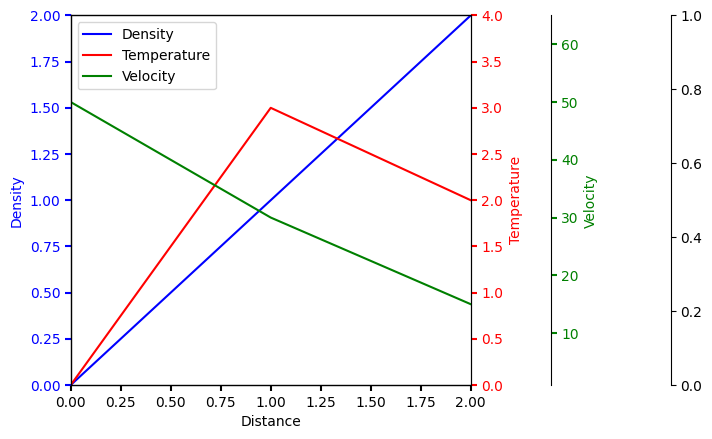

In [84]:







import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))
twin3.spines.right.set_position(("axes", 1.5))

p1, = ax.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
p2, = twin1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
p3, = twin2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")


ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
twin1.set_ylim(0, 4)
twin2.set_ylim(1, 65)

ax.set_xlabel("Distance")
ax.set_ylabel("Density")
twin1.set_ylabel("Temperature")
twin2.set_ylabel("Velocity")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()

In [88]:
data.head()

,contract_nr,bonus_malus_class_liability,bonus_malus_class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product_included,deductible_fully_comprehensive,deductible_partially_comprehensive,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults,SF_KH_num,SF_VK_num,payment_fault,young_driver,Friday_first
0,1,SF1/2,SF1/2,34,YOB,Original,New Vehicle,KH,0,0,Monthly,Insured and Spouse/Partner,Standard,10,11,12000,5.0,1.0,0.5,0.5,1,0,0
1,2,SF31,SF31,55,YOB,Original,Change of Insurer,KH,0,0,Pay In Full,Insured and Spouse/Partner,Standard,2,7,9000,6.0,0.0,31.0,31.0,0,0,0
2,3,SF5,SF5,52,YOB,Original,New Vehicle,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,11,12,20000,1.0,0.0,5.0,5.0,0,0,0
3,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,0.0,15.0,15.0,0,0,0
4,5,SF17,SF18,42,YOB,Original,Change of Insurer,VK,300,150,Monthly,Insured and Spouse/Partner,Standard,0,2,15000,3.0,0.0,17.0,18.0,0,0,0


In [145]:
test_small = pd.merge(left=test, right=X_test, on='contract_nr', how='inner').reset_index()
cols = list(test_small.columns)
test_small = pd.merge(left=test_small, right=preds_x_test, on='contract_nr', how='left')
test_small.columns = cols + ['predicted']
test_small.head()

,contract_nr,bonus_malus_class_liability,bonus_malus_class_comprehensive,age_insured_person,policy_start,tariff_type,type_of_insurance,comprehensive_product_included,deductible_fully_comprehensive_x,deductible_partially_comprehensive_x,payment_interval,insured_parties,profession_group,car_age_at_purchase,car_age_contract_start,annual_mileage,risk_predictor_zip_code,number_of_payment_faults,SF_KH_num,SF_VK_num,payment_fault,young_driver,Friday_first_x,age_group,sf_tpl_group,sf_fc_group,region_group,car_age_pur_group,car_age_cont_group,age_group@age_group_1_x,age_group@age_group_2_x,age_group@age_group_3_x,age_group@age_group_5_x,sf_tpl_group@sf_tpl_group_1_x,sf_tpl_group@sf_tpl_group_2_x,sf_tpl_group@sf_tpl_group_3_x,sf_tpl_group@sf_tpl_group_4_x,sf_tpl_group@sf_tpl_group_5_x,sf_fc_group@sf_fc_group_1_x,sf_fc_group@sf_fc_group_2_x,sf_fc_group@sf_fc_group_3_x,sf_fc_group@sf_fc_group_4_x,sf_fc_group@sf_fc_group_6_x,region_group@reg_group_1_x,region_group@reg_group_3_x,region_group@reg_group_4_x,car_age_pur_group@car_age_pur_group_2_x,car_age_pur_group@car_age_pur_group_3_x,car_age_cont_group@car_age_cont_group_02_x,car_age_cont_group@car_age_cont_group_03_x,car_age_cont_group@car_age_cont_group_04_x,car_age_cont_group@car_age_cont_group_05_x,car_age_cont_group@car_age_cont_group_06_x,car_age_cont_group@car_age_cont_group_07_x,car_age_cont_group@car_age_cont_group_08_x,car_age_cont_group@car_age_cont_group_09_x,car_age_cont_group@car_age_cont_group_10_x,car_age_cont_group@car_age_cont_group_11_x,profession_group@Public service_x,payment_interval@Pay In Full_x,tariff_type@Pay per km_x,policy_start@YEB_x,comprehensive_product_included@KH_x,comprehensive_product_included@TK_x,type_of_insurance@First Vehicle_x,type_of_insurance@New Vehicle_x,insured_parties@Insured and Others_x,const_x,deductible_fully_comprehensive_y,deductible_partially_comprehensive_y,Friday_first_y,age_group@age_group_1_y,age_group@age_group_2_y,age_group@age_group_3_y,age_group@age_group_5_y,sf_tpl_group@sf_tpl_group_1_y,sf_tpl_group@sf_tpl_group_2_y,sf_tpl_group@sf_tpl_group_3_y,sf_tpl_group@sf_tpl_group_4_y,sf_tpl_group@sf_tpl_group_5_y,sf_fc_group@sf_fc_group_1_y,sf_fc_group@sf_fc_group_2_y,sf_fc_group@sf_fc_group_3_y,sf_fc_group@sf_fc_group_4_y,sf_fc_group@sf_fc_group_6_y,region_group@reg_group_1_y,region_group@reg_group_3_y,region_group@reg_group_4_y,car_age_pur_group@car_age_pur_group_2_y,car_age_pur_group@car_age_pur_group_3_y,car_age_cont_group@car_age_cont_group_02_y,car_age_cont_group@car_age_cont_group_03_y,car_age_cont_group@car_age_cont_group_04_y,car_age_cont_group@car_age_cont_group_05_y,car_age_cont_group@car_age_cont_group_06_y,car_age_cont_group@car_age_cont_group_07_y,car_age_cont_group@car_age_cont_group_08_y,car_age_cont_group@car_age_cont_group_09_y,car_age_cont_group@car_age_cont_group_10_y,car_age_cont_group@car_age_cont_group_11_y,profession_group@Public service_y,payment_interval@Pay In Full_y,tariff_type@Pay per km_y,policy_start@YEB_y,comprehensive_product_included@KH_y,comprehensive_product_included@TK_y,type_of_insurance@First Vehicle_y,type_of_insurance@New Vehicle_y,insured_parties@Insured and Others_y,const_y,predicted
0,4,SF15,SF15,41,YEB,Original,Change of Insurer,TK,0,150,Monthly,Insured and Spouse/Partner,Standard,0,9,15000,6.0,0.0,15.0,15.0,0,0,0,age_group_4,sf_tpl_group_6,sf_fc_group_5,reg_group_2,car_age_pur_group_1,car_age_cont_group_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.068129
1,7,SF9,SF9,37,YEB,Original,Change of Insurer,VK,300,300,Monthly,Insured and Spouse/Partner,Standard,0,2,9000,7.0,0.0,9.0,9.0,0,0,0,age_group_3,sf_tpl_group_5,sf_fc_group_4,reg_group_2,car_age_pur_group_1,car_age_cont_group_01,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,300,300,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.066554
2,8,SF3,SF3,22,YEB,Pay

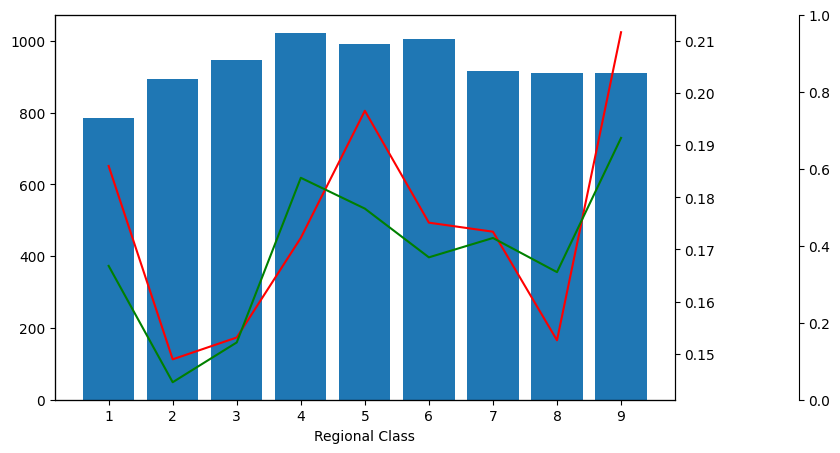

In [154]:



# Exposure
exp = test_small.groupby('risk_predictor_zip_code').agg({'contract_nr':'nunique', 'payment_fault':'mean', 'predicted':'mean'}).reset_index().sort_values('risk_predictor_zip_code', ascending=True)





fig, ax = plt.subplots(1,1,figsize=(8,5))

twin1 = ax.twinx()
twin2 = ax.twinx()

twin2.spines.right.set_position(("axes", 1.2))

# plot Exposure and 
ax.bar(data = exp, x='risk_predictor_zip_code' , height='contract_nr' )
ax.set_xlabel("Regional Class")

# plot observed values
twin1.plot(exp['risk_predictor_zip_code'], exp['payment_fault'], color='red')

#plot predicted_values
twin1.plot(exp['risk_predictor_zip_code'], exp['predicted'], color='green')


# parameter raus ziehen und plotten // dafür aber die Strecke oben aufräumen



#set labels 
plt.xticks(exp.risk_predictor_zip_code)
plt.show()

# P-Values checken

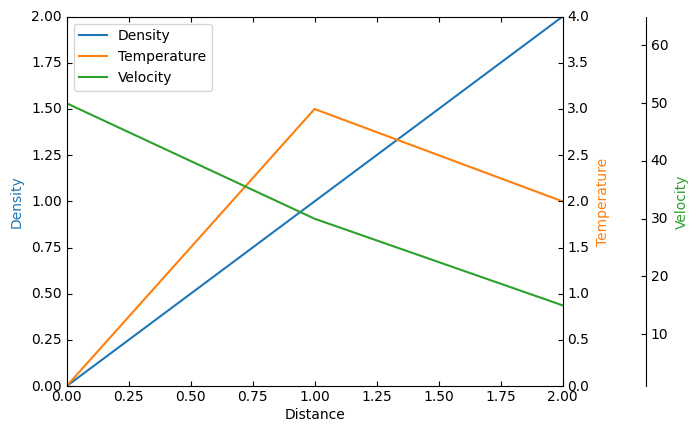

In [134]:
import matplotlib.pyplot as plt

from mpl_toolkits import axisartist
from mpl_toolkits.axes_grid1 import host_subplot




host = host_subplot(111, axes_class=axisartist.Axes)


#plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")




host.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
par1.set(ylim=(0, 4), ylabel="Temperature")
par2.set(ylim=(1, 65), ylabel="Velocity")




# Legende dazufügen
host.legend()

# Farbe an die Achsen
host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.show()


https://matplotlib.org/stable/gallery/axisartist/demo_parasite_axes2.html#sphx-glr-gallery-axisartist-demo-parasite-axes2-py